<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_3_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

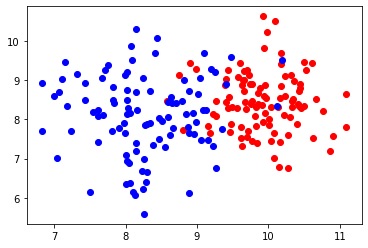

In [ ]:
mu_a=10.0
sigma_a=0.5

a=np.random.normal(mu_a,sigma_a,size=100)
data_a=np.zeros(a.size)

for i in np.arange(0,a.size):
  data_a[i]=1/(sigma_a * np.sqrt(2 * np.pi)) *np.exp( - (a[i] - mu_a)**2 / (2 * sigma_a**2))

a_ajuste = np.linspace(7.5,12.5)
ajuste_gaussiano_a = 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(a_ajuste-mu_a)**2/(2*sigma_a**2))

mu_b=8.5
sigma_b=0.75

b=np.random.normal(mu_b,sigma_b,size=100)
data_b=np.zeros(b.size)

for i in np.arange(0,a.size):
  data_b[i]=1/(sigma_b * np.sqrt(2 * np.pi)) *np.exp( - (b[i] - mu_b)**2 / (2 * sigma_b**2))

b_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_b = 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(b_ajuste-mu_b)**2/(2*sigma_b**2))
umbral=9
#----------------------------------------------------------------------------------------------------
mu_c=8.3
sigma_c=0.7

c=np.random.normal(mu_c,sigma_c,size=100)
data_c=np.zeros(c.size)

for i in np.arange(0,c.size):
  data_c[i]=1/(sigma_c * np.sqrt(2 * np.pi)) *np.exp( - (c[i] - mu_c)**2 / (2 * sigma_c**2))

c_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_c = 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(c_ajuste-mu_c)**2/(2*sigma_c**2))

mu_d=8.0
sigma_d=1.0

d=np.random.normal(mu_d,sigma_d,size=100)
data_d=np.zeros(d.size)

for i in np.arange(0,d.size):
  data_d[i]=1/(sigma_d * np.sqrt(2 * np.pi)) *np.exp( - (d[i] - mu_d)**2 / (2 * sigma_d**2))

d_ajuste = np.linspace(4.5,12.5)
ajuste_gaussiano_d = 1/(sigma_d*np.sqrt(2*np.pi))*np.exp(-(d_ajuste-mu_d)**2/(2*sigma_d**2))
umbral=9

plt.plot(a,b,'ro')
plt.plot(c,d,'bo')
plt.show()

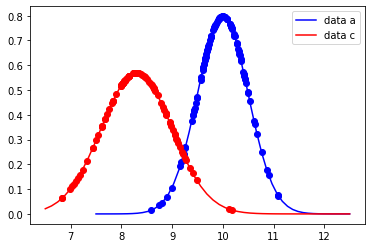

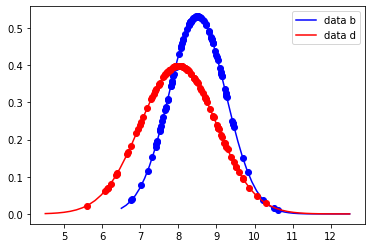

In [ ]:
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue',label='data a')
plt.plot(c,data_c,'ro')
plt.plot(c_ajuste,ajuste_gaussiano_c,'red',label='data c')
plt.legend(loc='upper right')
plt.show()

plt.plot(b,data_b,'bo')
plt.plot(b_ajuste,ajuste_gaussiano_b,'blue',label='data b')
plt.plot(d,data_d,'ro')
plt.plot(d_ajuste,ajuste_gaussiano_d,'red',label='data d')
plt.legend(loc='upper right')
plt.show()

In [ ]:
mean_a=np.mean(a)
mean_b=np.mean(b)
mean_c=np.mean(c)
mean_d=np.mean(d)
print(mean_a,mean_b,mean_c,mean_d)

9.920944460100596 8.44539355575616 8.277707936060223 8.099934518760772


In [ ]:
E_ab=np.zeros((2,2))

for i in np.arange(0,a.size):
  E_ab[0,0]=E_ab[0,0]+(a[i]-mean_a)**2  #Componente xx de la matriz de covarianza
  E_ab[0,1]=E_ab[0,1]+(a[i]-mean_a)*(b[i]-mean_b)   #Componente xy de la matriz de covarianza
  E_ab[(1,0)]=E_ab[(1,0)]+(b[i]-mean_b)*(a[i]-mean_a)   #Componente yx de la matriz de covarianza
  E_ab[(1,1)]=E_ab[(1,1)]+(b[i]-mean_b)**2  #Componente yy de la matriz de covarianza

E_ab=E_ab/a.size

print(E_ab)

[[ 0.24122422 -0.02647565]
 [-0.02647565  0.54762769]]


El conjunto A y B lo tomo como 0, y el conjunto C y D los tomo como 1

In [ ]:
t=np.asarray(np.zeros((2*a.size,3)))
for i in np.arange(0,a.size):
  t[i,0]=a[i]
  t[i,1]=b[i]
  t[i,2]=0
for i in np.arange(a.size,2*a.size):
  t[i,0]=c[i-a.size]
  t[i,1]=d[i-a.size]
  t[i,2]=1

data = pd.DataFrame(t,columns= ['x_position','y_position','class'])
print(data)

     x_position  y_position  class
0     10.904320    7.578553    0.0
1      9.610775    7.802990    0.0
2      9.833729    8.319514    0.0
3     10.076202    7.023264    0.0
4      9.765315    7.435830    0.0
..          ...         ...    ...
195    8.148304    7.184287    1.0
196   10.184324    9.523320    1.0
197    8.628922    7.594812    1.0
198    9.482007    9.584384    1.0
199    8.028909    8.276112    1.0

[200 rows x 3 columns]


Variables para generar las zonas pintadas en el gráfico

In [ ]:
h = .01  # step size in the mesh

x_min, x_max = t[:,0].min() - 1, t[:,0].max() + 1
y_min, y_max =t[:,1].min() - 1, t[:,1].max() + 1

#Creo la tabla de grillado para luego pintarla con las predicciones
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Considero los primeros 25 datos de cada distribución.

La variable train_size representa al número de datos que tomo para entrenamiento de cada subconjunto de datos. En este caso train_size=25

In [ ]:
x_train=np.zeros((50,2))
y_train=np.zeros(50)


x_test=np.zeros((150,2))
y_test=np.zeros(150)


#Voy a considerar 25 datos de cada distribución
train_size=int(x_train[:,0].size/2)

print('Tamaño de muestra de entrenamiento:',y_train.size)
print('Tamaño de muestra de testeo:',y_test.size)

print(data.iloc[4+a.size])
#Los primeros 25 datos de cada conjunto son de entrenamiento
for i in np.arange(0,train_size):
  x_train[i,:]=data.iloc[i,0:2]
  y_train[i]=data.iloc[i,2]
    #print(x_train[i],y_train[i])
for i in np.arange(0,train_size):
  x_train[i+train_size,:]=data.iloc[i+a.size,0:2]
  y_train[i+train_size]=data.iloc[i+a.size,2]
    #print(x_train[i],y_train[i])

#El resto de 75 datos de cada conjunto los uso como testeo  
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 25 al 75
for i in np.arange(0,int(y_test.size/2)):
  x_test[i,:]=data.iloc[i+y_train.size,0:2]
  y_test[i-train_size]=data.iloc[i+y_train.size,2]
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 125 al 200
for i in np.arange(0,int(y_test.size/2)):
  x_test[i+int(y_test.size/2),:]=data.iloc[i+train_size+int(t[:,0].size/2),0:2]
  y_test[i+int(y_test.size/2)]=data.iloc[i+train_size+int(t[:,0].size/2),2]

#x_train=data.iloc[0:25,0:2]
#y_train=data.iloc[a.size:(25+a.size),0:2]
print(t[:,0].size/2)
#print(y_train)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


Tamaño de muestra de entrenamiento: 50
Tamaño de muestra de testeo: 150
x_position    6.831431
y_position    8.918691
class         1.000000
Name: 104, dtype: float64
100.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'Knn neighbors --- k=3')

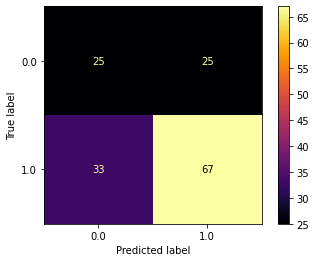

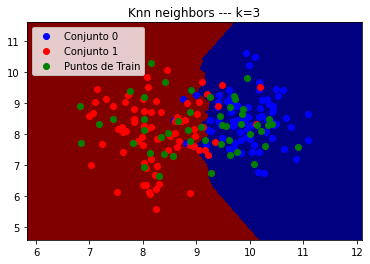

In [ ]:
z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3')

Considero los datos del 25 a 50 de cada distribución

Text(0.5, 1.0, 'Knn neighbors --- k=3')

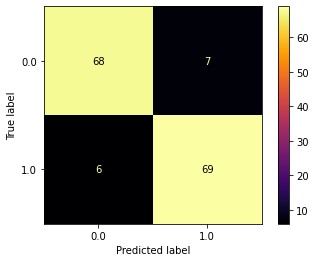

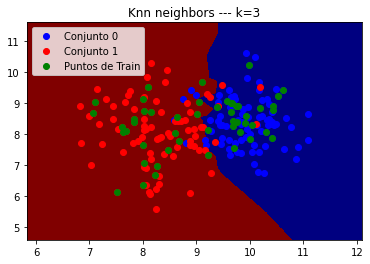

In [ ]:
for i in np.arange(0,train_size):
  x_train[i,:]=data.iloc[i+25,0:2]
  y_train[i]=data.iloc[i+25,2]
    #print(x_train[i],y_train[i])
for i in np.arange(0,train_size):
  x_train[i+train_size,:]=data.iloc[i+a.size+25,0:2]
  y_train[i+train_size]=data.iloc[i+a.size+25,2]
    #print(x_train[i],y_train[i])
  
#El resto de 75 datos de cada conjunto los uso como testeo  
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 0 al 25
for i in np.arange(0,train_size):
  x_test[i,:]=data.iloc[i,0:2]
  y_test[i-train_size]=data.iloc[i,2]
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 50 al 125
for i in np.arange(0,int(y_test.size/2)):
  x_test[i+train_size,:]=data.iloc[i+2*train_size,0:2]
  y_test[i+train_size]=data.iloc[i+2*train_size,2]
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 150 al 200
for i in np.arange(0,int(y_test.size/2)-train_size):
  x_test[i+train_size+int(y_test.size/2),:]=data.iloc[i+y_test.size,0:2]
  y_test[i+train_size+int(y_test.size/2)]=data.iloc[i+y_test.size,2]


#x_train=data.iloc[0:25,0:2]
#y_train=data.iloc[a.size:(25+a.size),0:2]
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3')

Considero los datos del 50 a 75 de cada distribución

Text(0.5, 1.0, 'Knn neighbors --- k=3')

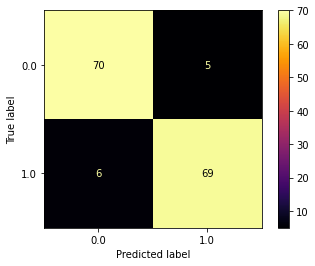

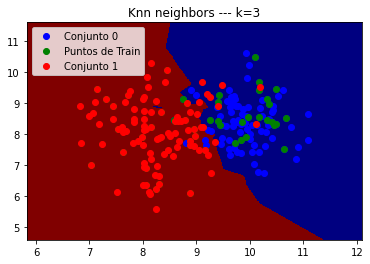

In [ ]:
for i in np.arange(0,train_size):
  x_train[i,:]=data.iloc[i+50,0:2]
  y_train[i]=data.iloc[i+50,2]
    #print(x_train[i],y_train[i])
for i in np.arange(0,train_size):
  x_train[i+train_size,:]=data.iloc[i+a.size+50,0:2]
  y_train[i+train_size]=data.iloc[i+a.size+50,2]
    #print(x_train[i],y_train[i])


#El resto de 75 datos de cada conjunto los uso como testeo  
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 0 al 50
for i in np.arange(0,2*train_size):
  x_test[i,:]=data.iloc[i,0:2]
  y_test[i-train_size]=data.iloc[i,2]
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 75 al 150
for i in np.arange(0,int(y_test.size/2)):
  x_test[i+2*train_size,:]=data.iloc[i+int(y_test.size/2),0:2]
  y_test[i+2*train_size]=data.iloc[i+int(y_test.size/2),2]
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 175 al 200
for i in np.arange(0,train_size):
  x_test[i+2*train_size+int(y_test.size/2),:]=data.iloc[i+y_test.size+train_size,0:2]
  y_test[i+2*train_size+int(y_test.size/2)]=data.iloc[i+y_test.size+train_size,2]

#x_train=data.iloc[0:25,0:2]
#y_train=data.iloc[a.size:(25+a.size),0:2]
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3')

Considero los datos del 75 al 100 de cada distribución.

Text(0.5, 1.0, 'Knn neighbors --- k=3')

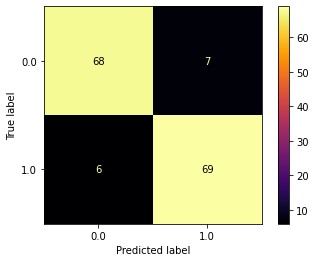

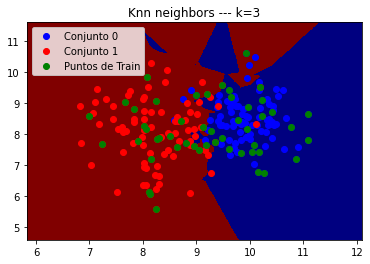

In [ ]:
for i in np.arange(0,train_size):
  x_train[i,:]=data.iloc[i+75,0:2]
  y_train[i]=data.iloc[i+75,2]
    #print(x_train[i],y_train[i])
for i in np.arange(0,train_size):
  x_train[i+train_size,:]=data.iloc[i+a.size+75,0:2]
  y_train[i+train_size]=data.iloc[i+a.size+75,2]
    #print(x_train[i],y_train[i])
  

#El resto de 75 datos de cada conjunto los uso como testeo  
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 0 al 75
for i in np.arange(0,int(y_test.size/2)):
  x_test[i,:]=data.iloc[i,0:2]
  y_test[i]=data.iloc[i,2]
#Adjunto en x_test e y_test los datos de la tabal t que van desde el indice 100 al 175
for i in np.arange(0,int(y_test.size/2)):
  x_test[i+int(y_test.size/2),:]=data.iloc[i+int(t[:,0].size/2),0:2]
  y_test[i+int(y_test.size/2)]=data.iloc[i+int(t[:,0].size/2),2]


#x_train=data.iloc[0:25,0:2]
#y_train=data.iloc[a.size:(25+a.size),0:2]
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3')

El último caso no posee gran cantidad de valores de falsos positivos ni falsos negativos, el problema es que la gráfica no parece ser del todo correcta, tiene algunas islas y presenta una forma rara. 

El método este de la selección de datos train no es el adecuado, al elegir de a 25 datos en el orden en que se encuentra es una elección random, ya que los datos dentro del dataset están colocados de manera random.

Pruebo hacer un clasificador utilizando los puntos centrales del gráfico, donde mas se intesectan las distribucones. 

Intento generar una circunferencia de radio R y utilizar como test los átomos que se encuentran dentro de esta circunferencia.

8.96190927564307 8.106939191425209
54
146


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in sqrt



Sensibilidad: 0.9605263157894737
Presicion: 0.9358974358974359
Exactitud: 0.9452054794520548
Fall_out: 0.07142857142857142



Text(0.5, 1.0, 'Knn neighbors --- k=3')

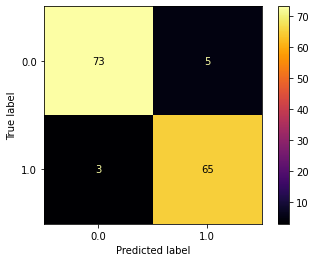

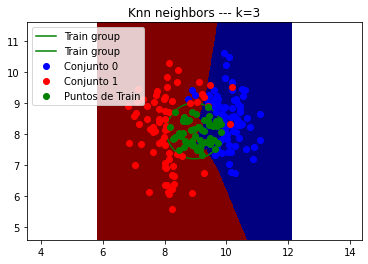

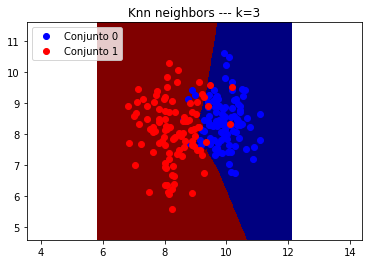

In [28]:
centro_x=(t[:,0].max()+t[:,0].min())/2
centro_y=(t[:,1].max()+t[:,1].min())/2

print(centro_x,centro_y)

k=[]
R=0.9
#data.iloc[:,0].size=200
for i in np.arange(0,data.iloc[:,0].size):
  dist=np.sqrt((data.iloc[i,0]-centro_x)**2+(data.iloc[i,1]-centro_y)**2)
  if dist<R:
    k.append(i)
    

#print(k)
#print(len(k))
x_train=np.zeros((len(k),2))
y_train=np.zeros(len(k))

x_test=np.zeros((t[:,0].size-len(k),2))
y_test=np.zeros(t[:,0].size-len(k))


for i in np.arange(0,len(k)):
  x_train[i]=data.iloc[k[i],0:2]
  y_train[i]=data.iloc[k[i],2]

m=0
n=0
f=0
#Registro los datos de testeo, hasta el último valor que está en el grupo
for i in np.arange(0,t[:,0].size):
  if m==int(len(k)):
    f=i
    break
  if i==k[m]:
    m=m+1
    continue
  x_test[n]=data.iloc[i,0:2]
  y_test[n]=data.iloc[i,2]
  n=n+1

#print(m)
#print(f)
#for i in np.arange(f,t[:,0].size):
 # x_test[n]=data.iloc[i,0:2]
 # y_test[n]=data.iloc[i,2]
 # n=n+1

  
print(y_train.size)
print(y_test.size)
#Variables del círculo de radio R para graficarlo       (x-centro_x)**2+(y-centro_y)**2=R**2 ------> y=+-sqrt(R**2-(x-centro_x)**2)+centro_y

x_circle=np.linspace(centro_x-R,centro_x+R)
y_circle_positive=np.sqrt(R**2-(x_circle-centro_x)**2)+centro_y
y_circle_negative=-np.sqrt(R**2-(x_circle-centro_x)**2)+centro_y



knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')


#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

print('')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)
print('')

plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(x_circle,y_circle_negative,'green',label='Train group')
plt.plot(x_circle,y_circle_positive,'green',label='Train group')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.legend(loc='upper left')
#plt.xlim(t[:,1].min()-1,t[:,0].max()+1)
#plt.ylim(t[:,1].min()-1,t[:,0].max()+1)
plt.axis('equal')
plt.title('Knn neighbors --- k=3')

plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
#plt.plot(x_circle,y_circle_negative,'green',label='Train group')
#plt.plot(x_circle,y_circle_positive,'green',label='Train group')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
#plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.legend(loc='upper left')
plt.axis('equal')
plt.title('Knn neighbors --- k=3')

Se puede variar el radio R para considerar un mayor número de puntos de entrenamiento. Para R mayor a 1 no varían mucho las propiedades de la clasificación, ya que ya se empiezan a considerar muchos puntos, con lo cual los puntos de testeo son los mas alejados de la zona de "mezcla" entre datos, con lo cual los datos de testeo estarían bien definidos.
Para R menor a 0.7 ya el sistema de clasificación es muy malo.
